## Clustering techniques

End-to-End Project Overview
1. Data Collection: Obtain a dataset for clustering.
2. Data Preprocessing: Clean and prepare the data for clustering.
3. Clustering: Apply the K-means clustering algorithm.
4. Evaluation: Evaluate the quality of the clusters using metrics and visualizations.
5. Visualization: Visualize the clusters using various techniques.
6. Conclusion: Summarize the findings.

### 1. Data Collection

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### 2. Data Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert to DataFrame for ease of use
scaled_data = pd.DataFrame(scaled_data, columns=iris.feature_names)

# Display the first few rows of the scaled data
print(scaled_data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


### 3. Clustering

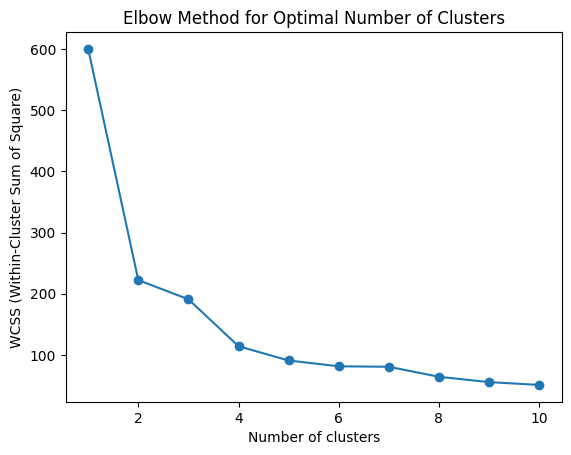

In [9]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (for example, 3)
optimal_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
data['Cluster'] = clusters


### 4. Evaluation

In [10]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.4798814508199817


### 5. Visualization

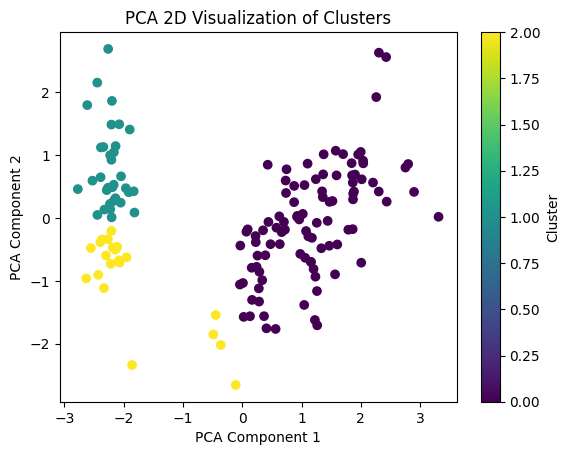

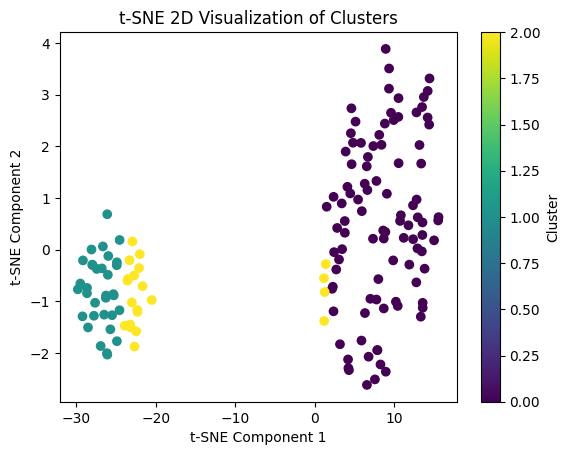

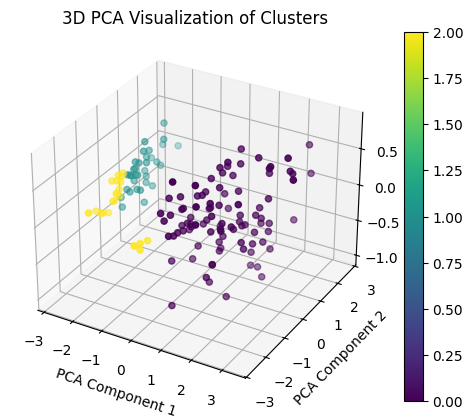

In [11]:
# PCA for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA 2D Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()

# t-SNE for 2D visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE 2D Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()

# 3D Visualization using PCA
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(scaled_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2], c=clusters, cmap='viridis')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA Visualization of Clusters')
plt.colorbar(sc)
plt.show()


### End of Notebook